In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
np.random.seed(20)

In [ ]:
# Step (1): Load the data

train_raw = loadmat('/content/drive/MyDrive/Study-Gate/CNN/train_32x32 (1).mat')
test_raw = loadmat('/content/drive/MyDrive/Study-Gate/CNN/test_32x32 (2).mat')

In [ ]:
# from data get images and thier labels

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])
train_labels = train_raw['y']
test_labels = test_raw['y']

In [ ]:
# do some data preprocessing to prepare them for the model 

# imageshas DataType uint8 not in list of allowed values so we need to convert the images into float 
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

#The labels must be of type int so Convert the labels into integers 
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [ ]:
# Step (2_1): Normalize the images data to bring it in the range of 0-1.

print('Image Data before Normalization: Min: {}, Max: {}'.format(train_images.min(), train_images.max()))
train_images /= 255.0
test_images /= 255.0
print('Image Data after Normalization: Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

Image Data before Normalization: Min: 0.0, Max: 255.0
Image Data after Normalization: Min: 0.0, Max: 1.0


In [ ]:
# Step (2_2): Encode the labels using one-hot vector encoding.

one_hot_encoding = LabelBinarizer()
train_labels = one_hot_encoding.fit_transform(train_labels)
test_labels = one_hot_encoding.fit_transform(test_labels)

In [ ]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [ ]:
# Data augmentation to enhance the size and quality of the training data

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
# Step (3): Define the architecture of the model

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(64, (5, 5), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (5, 5), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (5, 5), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(3072, activation='relu'),
    keras.layers.Dense(2048, activation='relu'),    
    keras.layers.Dense(10,  activation='softmax')
])

optimizer = keras.optimizers.SGD(lr=1e-1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# The Model architecture details

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         2

In [ ]:
# Step (4): Train the model using SGD optimizer 

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=20, validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
487/487 [==============================] - 66s 68ms/step - loss: 2.4147 - accuracy: 0.3542 - val_loss: 0.4571 - val_accuracy: 0.8580
Epoch 2/20
487/487 [==============================] - 33s 68ms/step - loss: 0.4511 - accuracy: 0.8597 - val_loss: 0.3204 - val_accuracy: 0.9062
Epoch 3/20
487/487 [==============================] - 33s 67ms/step - loss: 0.3116 - accuracy: 0.9050 - val_loss: 0.2896 - val_accuracy: 0.9163
Epoch 4/20
487/487 [==============================] - 33s 67ms/step - loss: 0.2576 - accuracy: 0.9227 - val_loss: 0.2875 - val_accuracy: 0.9153
Epoch 5/20
487/487 [==============================] - 33s 67ms/step - loss: 0.2003 - accuracy: 0.9412 - val_loss: 0.2883 - val_accuracy: 0.9164
Epoch 6/20
487/487 [==============================] - 33s 67ms/step - loss: 0.1679 - accuracy: 0.9505 - val_loss: 0.2923 - val_accuracy: 0.9142
Epoch 7/20
487/487 [==============================] - 32s 67ms/step - loss: 0.1367 - accuracy: 0.9574 - val_loss: 0.2738 - val_accuracy:

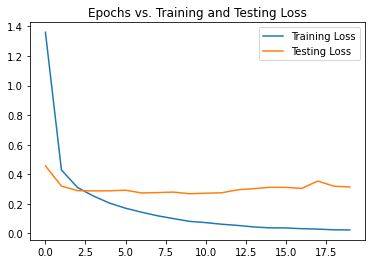

In [ ]:
# Step (5): Plot the training and testing curves as a function of epochs: Loss 

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Training and Testing Loss')
plt.show()

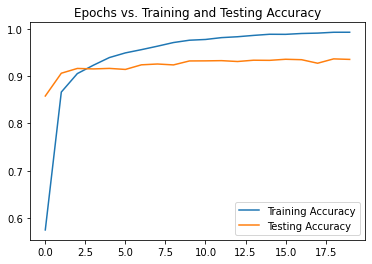

In [ ]:
# Plot the training and testing curves as a function of epochs: Accuracy

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Testing Accuracy')
plt.show()

In [ ]:
# Test model on the test set
# the final classification accuracy on testing set.

test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is ', test_acc)

Test accuracy is  0.9304317831993103
